# <center> Twitter's Climate Tide: An Analysis of Tweets About Climate Change </center>
## <center> By Arjun Gandhi </center>
## <center> December 20, 2020 </center>

!["Impacts of Climate Change (Source: NASA)"](climate_change.jpg)
<center>Impacts of Climate Change (https://climate.nasa.gov/effects/)</center>

# <center>Introduction</center>
In this project I will be looking at data from Twitter, specifically tweets about climate change collected by George Washing University from 2017 to 2019 with most data from 2018. I will be looking at things like what was the most common things talked about in relation to climate and what the sentiment was for the all these tweets, a specific time, etc. I will also later on try to predict the sentiment of a tweet using a variety of learning algorithms.

# <center> Getting started </center>

### The libraries I will be using are: [matplotlib](https://matplotlib.org/index.html#), [pandas](https://pandas.pydata.org), [spaCy](https://spacy.io), [seaborn](https://seaborn.pydata.org), [Gensim](https://radimrehurek.com/gensim/), [wordcloud](http://amueller.github.io/word_cloud/), [scikit-learn](https://scikit-learn.org/stable/), and [VADER](https://github.com/cjhutto/vaderSentiment).
### Let's install everything I will need

In [1]:
# Wordcloud
#!pip install wordcloud

# Seaborn
#!pip install seaborn --upgrade
# Gensim
#!pip install --upgrade gensim

# Spacy
#!pip install -U spacy
#!pip install -U spacy-lookups-data
#!python -m spacy download en_core_web_sm

# VADER
#!pip install vaderSentiment

### Import everything needed

In [103]:
# Basics and essentials 
import pandas as pd
import string
import re
import datetime
import random

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Natural language processing and machine learning
import spacy
import gensim
# Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# <center> Data Collection </center>
I did not go and scrape Twitter to get all tweets that were on climate. Instead, I found a GWU dataset of climate change tweets that were collected from 2017-2019 (Littman, Justin; Wrubel, Laura, 2019, "Climate Change Tweets Ids", https://doi.org/10.7910/DVN/5QCCUU, Harvard Dataverse, V1). I downloaded my sample from GWU which makes picking your criteria for the tweets much easier. You can make your own data set from all 40 million right [here](https://tweetsets.library.gwu.edu/datasets).  

Here is a link to my exact sample: http://tweetsets.library.gwu.edu/dataset/723265b8. You can also see my sample in the form of the tweet ids in my GitHub repo: [arjungandhi521/arjungandhi521.github.io/public_data/tweets_125k.txt](https://github.com/arjungandhi521/arjungandhi521.github.io/blob/main/public_data/tweet_ids_125k.txt). 

I sampled 125,000 of the 40 million tweets. The CSV I use directly below is private because of Twitter policy that one should not publish large amounts of tweets but that people in academics and such can go ahead and publish the tweet ids. As stated in the GWU link the data is from September 21, 2017 and May 17, 2019 and they had a gap in data collection from January 7, 2019 to April 17, 2019. 

I chose to exclude retweets and this sample ranges from late 2017 to mid-2019 which is the full collection time. I excluded retweets because even though a tweet with 1 billion RTs may have high influence on Twitter, having it n times in the dataset is not really going to add to my understanding of the language. I still have access to the favorites and retweets data which I will use later on. 

To convert each tweet ID into the actual tweet data I am using Hydrator: Hydrator [Computer Software]. Retrieved from https://github.com/docnow/hydrator. From the above repo, I downloaded [version 0.0.13 of the app](https://github.com/DocNow/hydrator/releases/tag/v0.0.13). I made a Twitter account to connect my account this Hydrator. When you download the sample just pick to download tweet ids. This will be a compressed .txt file. Just unzip it and then upload the file into Hydrator under "Datasets" in the desktop app. Then hit "Add Dataset" and then "Start" and then when its done you can click CSV to get the JSONL as a CSV. When I hydrated the tweets (turned them from tweet ids into tweets you see below), I started with 125,000 ids but the data frame directly below has less. This is for several reasons including people making their accounts private and deleted tweets and accounts. These tweet ids were put into the data set before these thing happend.

In [3]:
data = pd.read_csv("./data/tweets_125k.csv")
data 

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Tue Dec 11 01:00:00 +0000 2018,UN cdnpoli ONpoli ABpoli,https://twitter.com/TheRebelTV/status/10722948...,https://www.therebel.media/un-global-warming-m...,91,1072294898588631040,NaN,NaN,NaN,...,207643,17379,1266,Canada and the world,Rebel News,RebelNewsOnline,39345,NaN,https://www.rebelnews.com,True
1,NaN,Mon Jan 22 09:49:35 +0000 2018,NaN,NaN,NaN,0,955376892026093569,Pontifex,9.551606e+17,5.007043e+08,...,1,4,0,United States,Frank,Frank34802901,100,NaN,NaN,False
2,NaN,Mon Sep 17 04:42:16 +0000 2018,NaN,NaN,https://truthout.org/articles/national-park-of...,0,1041547863795224576,NaN,NaN,NaN,...,2062,2383,99,USA,OurRevolution,LeftysUnite,50076,NaN,NaN,False
3,NaN,Sat Aug 04 13:02:13 +0000 2018,Spain Portugal climatechange globalwarming Hea...,NaN,https://news.sky.com/story/live-scorching-satu...,1,1025728615399469058,NaN,NaN,NaN,...,25,24,1,NaN,Steven Hugh,Steven9Hugh,1402,NaN,https://stevenhugh.wordpress.com/,False
4,NaN,Tue Nov 21 10:17:51 +0000 2017,Resist FakePresident Dontard GOP NRA War Clima...,NaN,https://twitter.com/mattmfm/status/93272970237...,0,932915956824682496,NaN,NaN,NaN,...,6214,6747,121,"the beautiful ""Jemez"" USA",Athoughtz,athoughtz,155954,NaN,http://TokTok.com,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91264,NaN,Sat Apr 27 16:22:49 +0000 2019,NaN,NaN,NaN,1,1122174270208126978,bruceanderson,1.122169e+18,8.037439e+07,...,491,779,9,Regina,sean osmar,SeanOsmar,2229,NaN,NaN,False
91265,NaN,Sat Apr 27 11:36:03 +0000 2019,plasticpollution climatechange,NaN,NaN,0,1122102103185547270,RochdaleCouncil,NaN,2.052017e+07,...,87,177,6,Wandering the Wastelands,Gatt 🇬🇧🇪🇺,Gatt_,2591,NaN,NaN,False
91266,NaN,Sat Apr 27 16:23:09 +0000 2019,NaN,NaN,https://www.usatoday.com/story/news/nation/201...,0,1122174355084062720,NaN,NaN,NaN,...,110,644,2,"Omaha, Nebraska",Dee Dee,Dee_Dee2018,2765,NaN,NaN,False
91267,NaN,Sat Apr 27 16:23:07 +0000 2019,NaN,NaN,NaN,0,1122174343562158081,NaN,NaN,NaN,...,2217,1838,450,Vancouver,Bonnie,greenurlifenow,254477,NaN,NaN,False


As you can see, there is many columns. Most of these won't help me so many will have to go. Others need some fixing up to be useful like the date and time string need to be date objects.

# <center> Data Wrangling </center>
The data set has lots of data that is not needed for this analysis. The data set is multilingual and so to make things simple for this project we will just drop the non-English tweets.

There are lots of extranenous columns that are not relavent to this project so I just dropped them. These included geolocation data that was often missing, user information, and extranenous data about a tweet like time zone and lanague (since I drop all non-English ones to begin). These include things like user specifics like their profile details and other things like the URL of thr tweet or the language since all will be English. 

I followed this tutorial for help with tasks like lemmatization here and in the next section (EDA/Data Viz) making bags of words and word clouds.
https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/ 

## Remove non-English tweets and extraneous columns.

In [ ]:
# Remove non-English tweets from the data set
data = data[data["lang"] == "en"]

# Drop all the unneeded columns from the data set
cols_to_delete = ["user_urls", "user_statuses_count", "coordinates", "user_name", "in_reply_to_status_id", 
                  "in_reply_to_user_id", "user_time_zone", "urls", "lang", "media", "source", 
                  "retweet_screen_name", "retweet_id", "possibly_sensitive", "tweet_url",
                  "user_default_profile_image", "user_friends_count", "user_verified", "user_location", 
                   "in_reply_to_screen_name", "user_screen_name.1",
                  "user_favourites_count", "user_listed_count", "user_created_at", "user_description", "place", 
                 "user_followers_count", "hashtags"]

data.drop(columns=cols_to_delete, inplace=True)

# Swap the index column from 0...n to the tweet ID and rename the column from id to tweetID and rename to clarify
# column meaning
data = data.rename(columns={"id": "tweetID", "created_at": "date/time", "user_screen_name": "tweeter"})
data = data.set_index('tweetID')
data

## Combine the likes and retweets for total interaction score.
I will treat that with equal weight in this score for simplicity.

In [5]:
# Combine the number of favorites and retweets for a tweet into an total interactions score
total_interactions = []

for row in data.iterrows():
    tweet = row[1] 
    total = tweet["retweet_count"] + tweet["favorite_count"]
    total_interactions.append(total)

# Swap out the current RT and favorites columns for the total interactions columns
data["total_interactions"] = total_interactions
data = data.drop(columns=["retweet_count", "favorite_count"])
data.head()

,date/time,text,tweeter,total_interactions
tweetID,,,,
1072294898588631040,Tue Dec 11 01:00:00 +0000 2018,.@TheRebelTV goes to two different #UN confere...,RebelNewsOnline,146
955376892026093569,Mon Jan 22 09:49:35 +0000 2018,@Pontifex Prayers to God the one &amp; only t...,Frank34802901,0
1025728615399469058,Sat Aug 04 13:02:13 +0000 2018,Red alert in #Spain and #Portugal as Europe ne...,Steven9Hugh,1
932915956824682496,Tue Nov 21 10:17:51 +0000 2017,Trump /GOP are the swamp #Resist #FakePresiden...,athoughtz,0
1041547806622797824,Mon Sep 17 04:42:02 +0000 2018,Study: Green Buildings Save $6.7 Billion in #H...,IndiaGreenBldg,4


## Convert the time/date strings into date objects
I do this because these are much easier to use and more usefulf for analysis later on.

In [6]:
# Convert the dates time strings into datetime objects
dates = []

# Matching this text
# Mon Jan 22 09:49:35 +0000 2018
# For every row in the dataframe
regex = re.compile(r"(\w{3}) (\w{3}) (\d\d) (\d\d:\d\d:\d\d) \+(0{4}) (\d{4})")

# Given a string of a month return the corresponding integer for that month i.e. Jan == 1
def numerize(str):
    month = str.lower()
    if (month == "jan"): return 1
    elif (month == "feb"): return 2
    elif (month == "mar"): return 3
    elif (month == "apr"): return 4
    elif (month == "may"): return 5
    elif (month == "jun"): return 6
    elif (month == "jul"): return 7 
    elif (month == "aug"): return 8
    elif (month == "sep"): return 9
    elif (month == "oct"): return 10
    elif (month == "nov"): return 11
    elif (month == "dec"): return 12
        
for row in data.iterrows():
    dt = row[1]["date/time"]
    matches = re.search(regex, dt)
    groups = matches.groups()    
    month = numerize(groups[1])
    d = datetime.date(int(groups[5]), month, int(groups[2]))
    dates.append(d)
    
data = data.drop(columns=["date/time"])
data["date_tweeted"] = dates
data.head()

,text,tweeter,total_interactions,date_tweeted
tweetID,,,,
1072294898588631040,.@TheRebelTV goes to two different #UN confere...,RebelNewsOnline,146,2018-12-11
955376892026093569,@Pontifex Prayers to God the one &amp; only t...,Frank34802901,0,2018-01-22
1025728615399469058,Red alert in #Spain and #Portugal as Europe ne...,Steven9Hugh,1,2018-08-04
932915956824682496,Trump /GOP are the swamp #Resist #FakePresiden...,athoughtz,0,2017-11-21
1041547806622797824,Study: Green Buildings Save $6.7 Billion in #H...,IndiaGreenBldg,4,2018-09-17


## Prepare the tweets for sentiment analysis
### Remove links
Links do not add meaning to a tweet when analyzing their sentiment and visualizing what people say so they are just texual clutter and thus we will delete them with the magic of regular expressions!

In [7]:
linkless = []
regex = re.compile(r"http\S+")

# remove all links from each tweet
for row in data.iterrows():
    txt = row[1]["text"]
    if txt.find("https://t.co"): 
        ll = re.sub(regex, "", txt)
        linkless.append(ll)
    else: 
        linkless.append(txt)

data["text"] = linkless
data.head()

,text,tweeter,total_interactions,date_tweeted
tweetID,,,,
1072294898588631040,.@TheRebelTV goes to two different #UN confere...,RebelNewsOnline,146,2018-12-11
955376892026093569,@Pontifex Prayers to God the one &amp; only t...,Frank34802901,0,2018-01-22
1025728615399469058,Red alert in #Spain and #Portugal as Europe ne...,Steven9Hugh,1,2018-08-04
932915956824682496,Trump /GOP are the swamp #Resist #FakePresiden...,athoughtz,0,2017-11-21
1041547806622797824,Study: Green Buildings Save $6.7 Billion in #H...,IndiaGreenBldg,4,2018-09-17


### "Preprocess" the tweets
I will use Gensim to clean up the text of the tweet. It will get rid of long and short words that do not add meaning to a tweet. This function call will also do things like make the tweets all lower case so they are treated as the same words later no matter what their case usage is. It will also tokenize the tweet but what does that mean you ask?
#### Tokenization
Tokenization a fundemental first step before you do anything in code with natural language to understand it. Tokenization is taking a piece of text like "Python is the best" and making into a list of the words that make up that text so here that would be ["Python", "is", "the", "best"]. You can find a more in-depth explanation of tokenization here if you're so interested: https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/. Though I never explicity call something like tokenize(tweet), the preprocess function right here and the lemmatize later on are doing this. The reasons I do this twice is I want to clean up the tweet before I lemmatize (explained later) and lemmatize needs a string not a string list.

In [8]:
tweets = []
for r in data.iterrows():
    tweets.append(gensim.utils.simple_preprocess(r[1]["text"]))

# don't need the text columns anymore
data = data.drop(columns=["text"])

data["tokens"] = tweets 
data.head()

,tweeter,total_interactions,date_tweeted,tokens
tweetID,,,,
1072294898588631040,RebelNewsOnline,146,2018-12-11,"[therebeltv, goes, to, two, different, un, con..."
955376892026093569,Frank34802901,0,2018-01-22,"[pontifex, prayers, to, god, the, one, amp, on..."
1025728615399469058,Steven9Hugh,1,2018-08-04,"[red, alert, in, spain, and, portugal, as, eur..."
932915956824682496,athoughtz,0,2017-11-21,"[trump, gop, are, the, swamp, resist, fakepres..."
1041547806622797824,IndiaGreenBldg,4,2018-09-17,"[study, green, buildings, save, billion, in, h..."


### Stopwords and Lemmatization 
Here I will remove stopwards from the tweet bodies. These are words like "I" and "this" that add little meaning to the tweet but if left in the text will give me an innacurate depiction of the most common words in the tweets. Most stopwords are likely gone but this is just a double check for them basically and is simple to do when I lemmatize so why not? Thne I will perform lemmatization on the tweets. This just means taking words that linguisticlly mean the same thing like walker and walking and reducing them to their base. In this case the word walk. You can read more here: https://en.wikipedia.org/wiki/Lemmatisation. 

In [9]:
# Load the model 
model = spacy.load('en_core_web_sm')

lemmatized = []
# Lemmatization of tweets and stopwords removal
for r in data.iterrows():
    # get tokens
    tweet = r[1]["tokens"] 
     # need as string to lemmatize
    text = " ".join(tweet)
    # lematize and remove stopwords
    lemmas = [tok.lemma_ for tok in list(model(text)) if (tok.is_stop==False)] 
    # save lemma tokens
    lemmatized.append(lemmas) 
    
data["tokens"] = lemmatized
data.head()

,tweeter,total_interactions,date_tweeted,tokens
tweetID,,,,
1072294898588631040,RebelNewsOnline,146,2018-12-11,"[therebeltv, go, different, un, conference, me..."
955376892026093569,Frank34802901,0,2018-01-22,"[pontifex, prayer, god, amp, true, father, jes..."
1025728615399469058,Steven9Hugh,1,2018-08-04,"[red, alert, spain, portugal, europe, near, ti..."
932915956824682496,athoughtz,0,2017-11-21,"[trump, gop, swamp, resist, fakepresident, don..."
1041547806622797824,IndiaGreenBldg,4,2018-09-17,"[study, green, building, save, billion, health..."


The tweets are now ready to do some analysis and visualization since we have them in a usable form for visualization and sentiment analysis.

# <center> Exploratory Data Analysis and Data Visualization </center>

In this section, I will look at a number of aspects of the data. I will start off by just looking at when do people tweet about climate the most. Then I will do a number of word cloud visuazlaitons by things like year and peak times for tweeting about climate. To do these, I create bags of words and then sum over the rows so I make the word cloud using a one row data frame. Then I will look at the "length" of the tweet (normalzied for stopwords and semantically useless words). I will visualize a distribution of who is tweeting about climate as in how much are different people contributing to the data. I used the same [tutorial](https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/) here that I mentioned above to do word cloud visualizations. .

## Tweet Frequency Over Time

### Add a year column to the dataframe

In [10]:
# To make splitting up the data frame up by time easier, I will add a year column to the tweet
years = []
for r in data.iterrows(): 
    years.append(r[1]["date_tweeted"].year)
data["year"] = years
data.head()

,tweeter,total_interactions,date_tweeted,tokens,year
tweetID,,,,,
1072294898588631040,RebelNewsOnline,146,2018-12-11,"[therebeltv, go, different, un, conference, me...",2018
955376892026093569,Frank34802901,0,2018-01-22,"[pontifex, prayer, god, amp, true, father, jes...",2018
1025728615399469058,Steven9Hugh,1,2018-08-04,"[red, alert, spain, portugal, europe, near, ti...",2018
932915956824682496,athoughtz,0,2017-11-21,"[trump, gop, swamp, resist, fakepresident, don...",2017
1041547806622797824,IndiaGreenBldg,4,2018-09-17,"[study, green, building, save, billion, health...",2018


### How many tweets are there per month?

In [11]:
tweets_per_month = {}
# As you may recall data was collected from September 21, 2017 and May 17, 2019 and they had a gap in 
# data collection from January 7, 2019 to April 17, 2019.

# Initalize the value for a tuple key for the month/year pair to 0 for all months where data was collected
# 2017
for i in [9, 10, 11, 12]: 
    tweets_per_month[(i,2017)] = 0
# 2018
for i in range(1,13): 
    tweets_per_month[(i,2018)] = 0
# 2019
for i in [1, 4, 5]: 
    tweets_per_month[(i,2019)] = 0
    
# Iterate over data frame and add one to each tweet's proper month/year tuple's value
for r in data.iterrows():
    row = r[1]
    date = row["date_tweeted"]
    tweets_per_month[(date.month, date.year)] += 1
    
# Remove Septembr 2017 and January-April 2019 because most during most of the month data was not collected
tweets_per_month.pop((9, 2017))
tweets_per_month.pop((1, 2019))
tweets_per_month.pop((4, 2019))
# I decided to also drop May 2019 from this visualization because if I leave it then there is a 5 month gap in
# data and this is not reflected in the plot.
tweets_per_month.pop((5, 2019))

# Convert the tuples to strings
time = list(tweets_per_month.keys())
count = list(tweets_per_month.values())

dates = []
for t in time: 
    dates.append(str(t[0]) + "/" + str(t[1])[-2:])
    
print("Tweets per month:")
tweets_per_month

Tweets per month:


{(10, 2017): 4585,
 (11, 2017): 3911,
 (12, 2017): 9897,
 (1, 2018): 6850,
 (2, 2018): 4106,
 (3, 2018): 3260,
 (4, 2018): 3226,
 (5, 2018): 3230,
 (6, 2018): 2940,
 (7, 2018): 3409,
 (8, 2018): 7396,
 (9, 2018): 5023,
 (10, 2018): 2476,
 (11, 2018): 2137,
 (12, 2018): 8315}

### Plot frequency of tweeting

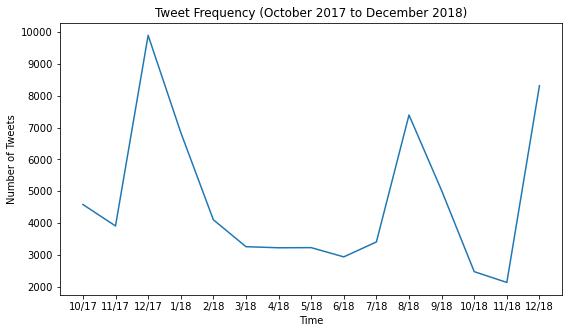

In [12]:
df = pd.DataFrame(columns = ['date', 'tweet_count'])
df['date'] = dates
df['tweet_count'] = count

dims = (9, 5)
fig, ax = plt.subplots(figsize=(9, 5))
plot = sns.lineplot(ax=ax, data=df, x=df['date'], y=df['tweet_count'])
plot = plot.set(title="Tweet Frequency (October 2017 to December 2018)",xlabel="Time",ylabel="Number of Tweets")

As you can see there were several time periods where the frequency of tweeting about climate was a bit higher than others. December 2017 is particularlly high so I will look into that more below. I will look into these time periods a bit more below. Though, we can see that for the most part, people tweet a good amount about climate throughout the year and there really isn't one obvious patter that we can learn from this graph.

## Bag of Words and Word Clouds
Here I am going to write be converting dataframes of tweets into bags of words. What that basically means is I look at a set of tweets and then will make a matrix representation of these tweets as one. So every possible word in all the tweets will be the columns and the tweet ids will be my rows. Each row is a tweet. Every word in all the tweets gets a column. If tweet #10 in its row has "java" 10 times then it will have a ten in that cell, if it has "cowboy" 0 times than it has a 0 there. Most cells will be 0 because there are LOTS of columns but only so many words one uses in any single tweet. I will then use these bags of words to make word clouds which will represent the bag of words with words on an image where the more a word is used, the bigger it is.

In [13]:
# These were the terms used for collecting tweets, terms with space have been made into two elements and duplicates
# are remoevd. The final one amp, is just HTML for "&" and so we do not want that in the visuals because its not a
# word and its not semantically meaningful
rm = ["climatechange", "climate", "change", "real", "act", "climate", "global", "warming", "hoax", "denier", 
      "false", "not", "amp"]

# Object to vectorize words into a bag of words?
cv=CountVectorizer(analyzer='word')

# add a column with the text of each tweet as one string
tweets = []
for r in data.iterrows():
    tweets.append(" ".join(r[1]["tokens"]))
data["tweet"] = tweets

# define a function that takes in a data frame of tweets and returns a bag of words w/ the help of sklearn
def make_bag_of_words(tweets):
    info = cv.fit_transform(tweets["tweet"])
    bow = pd.DataFrame(info.toarray(), columns=cv.get_feature_names())
    bow.drop(columns=rm, inplace=True)
    bow.index=tweets.index
    return bow

# make a bag of words for each year i have data on
bags = []
for i in range(2017,2020): 
    bags.append(make_bag_of_words(data[data["year"] == i]))
    
# example output for 2018
bags[2].head()

,a_film_maker,a_joyful_cynic,aaaaahhhhh,aaaarrrggghhh,aaahhhh,aafp,aanthanurdc,aaronatfoe,aaronbastani,aaroncarpenter,...,सभ,𝒢𝓁𝑜𝒷𝒶𝓁,𝒲𝒶𝓇𝓂𝒾𝓃𝑔,𝒾𝓈𝓃,𝓇𝑒𝒶𝓁,𝗳𝗶𝗿𝗲,𝗶𝘀,𝗼𝗻,𝗽𝗹𝗮𝗻𝗲𝘁,𝘁𝗵𝗲
tweetID,,,,,,,,,,,,,,,,,,,,,
1129451400457543681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1129451354920030208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1129451429364502529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1129451461426012160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1129451476517085185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Shockingly, you probably aren't getting much insight from looking at this massisve matrix of mostly 0s. So lets create a function to take that data and make it into a word cloud!

### Write a function that makes a word cloud, given a bag of words

In [14]:
# I made a function that will display a word cloud give the word frequencies as a df
def make_word_cloud(freqs):
    wc = WordCloud(width=1000, height=800, max_words=50,colormap="Dark2").generate_from_frequencies(freqs.sum())
    plt.figure(figsize=(10,8))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

2017 Climate Change Tweets


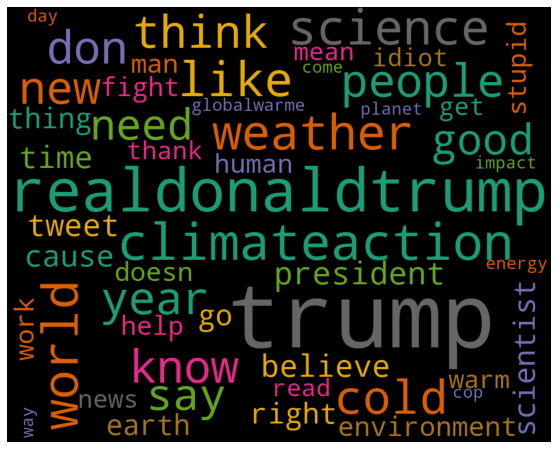

2018 Climate Change Tweets


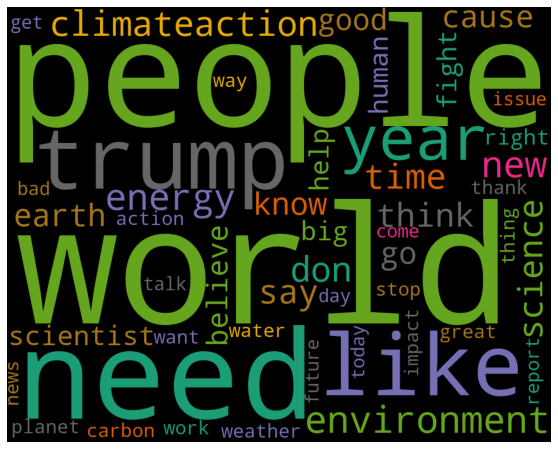

2019 Climate Change Tweets


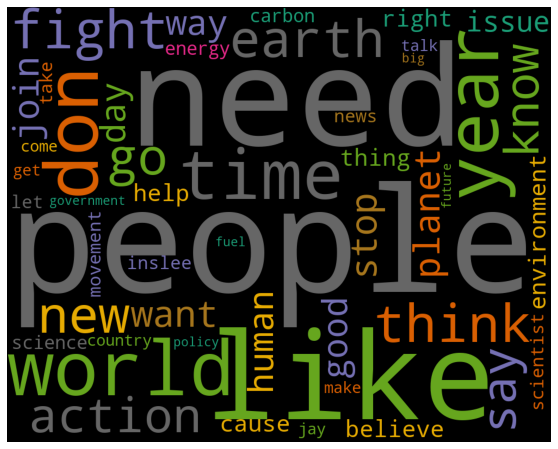

In [15]:
# Call make word cloud each bag of words summed so its one row for all tweets in that year (2017-19)
title = ["2017", "2018", "2019"]
for i in range(3): 
    print(title[i]+ " Climate Change Tweets")
    make_word_cloud(bags[i])

### Most interacted with tweets
Here I will use the WordCloud library to visualize the 1000 most interacted with tweets. I define an interaction as a favorite or retweet and I weighted them equally when I combined the two earlier.

Top 1,000 Most Interacted With Tweets


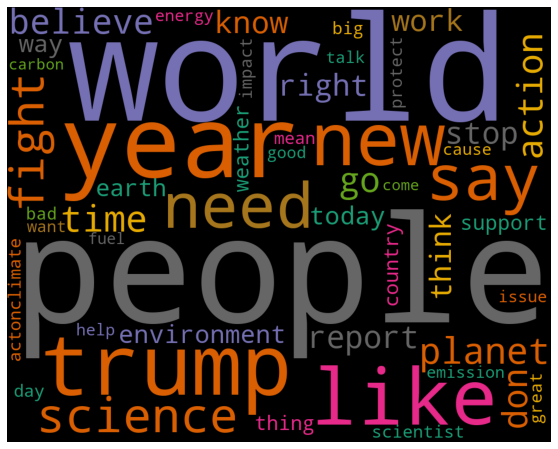

In [16]:
# Make a word count of the most interacted with tweets (what got the most likes and retweets)
data = data.sort_values(by=["total_interactions"], ascending=False)
top_1000 = data.head(1000)
print("Top 1,000 Most Interacted With Tweets")
make_word_cloud(make_bag_of_words(top_1000))

It looks like the popular kids on Twitter are largely tweeting the same words as everyone else. Could be interesting later on to see if they have a different sentiment though?!

### The peek month of climate tweeting

December 2017 Climate Change Tweets


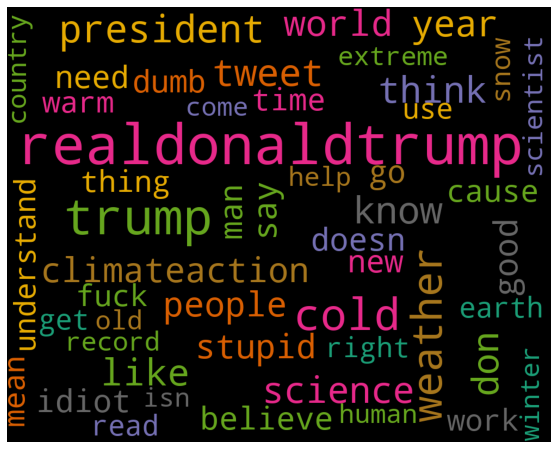

In [17]:
twentyseventeen = data[data["year"] == 2017] 
start = datetime.date(2017, 12, 1) # start of december
dec_2017 = twentyseventeen[twentyseventeen["date_tweeted"] >= start] 
bow_12_17 = make_bag_of_words(dec_2017)
print("December 2017 Climate Change Tweets")
make_word_cloud(bow_12_17) 

## Normalized Length of Tweet
Here when I say normalzied all I mean is that we are only looking a the string that contains text that is semantically meaningful i.e. not short words and very long words like I, you, this, that, etc.

In [ ]:
data['tweet_length']=data['tokens'].apply(lambda tokens: len(tokens))
plot = sns.barplot(x='year',y='tweet_length',data=data)
plot.set(title="Normalized Length of Tweet",xlabel="Year",ylabel="Length")

# go ahead the drop the tweet length so df is more readable/short width later on
data = data.drop(columns=["tweet_length"])

Recall that the length of the Tweet that we are looking at here is approximate because we removed things like links (which are notably not words) and GenSim's preprocess() function removes very short and long words from the tweets to help me get the most semantically meanigful words from the tweets.

When looking at this graph one major thing to consider is that it may not be such a simple oh tweet length about climate must be going up year after year for a couple of reasons. One major factor is the sample from 2018 is much larger than the other two because the majority of data colleciton took place in 2018 and much of Jan-Apr 2019 lacked sampling. In 2019, GWU collected data the first week of January, not at all in Feb-Mar, the last two weeks of April, and most of May.

So roughly speaking we can say that tweet length may have increased when talking about tweets related to climate change but because of what I just said this is at best a rough guess because we aren't really saying massive changes in length for example between 2018 and 2019.

## Are we just seeing a few dominant voices on Twitter?
Lets look at the distribution of tweet count about climate to see if these most of these tweets are coming from a few tweeters.

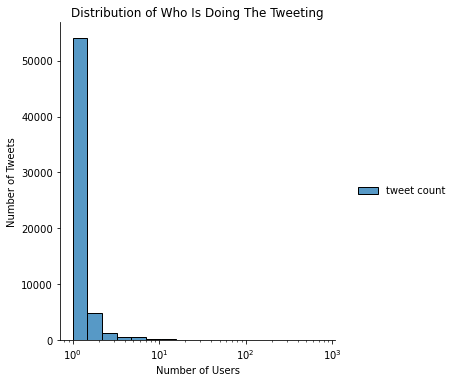

In [19]:
# set of tweeters 
tweeters = list(set(data["tweeter"]))
times_tweeted = dict.fromkeys(tweeters , 0)

# Calculate how many times each tweeter has tweeted
for r in data.iterrows():
    row = r[1]
    user = row["tweeter"]
    times_tweeted[user] += 1
    
# get key and values as lists
users = list(times_tweeted.keys())
counts = list(times_tweeted.values())

# put them in a dataframe
df = pd.DataFrame(columns = ['user', 'tweet count'])
df["user"] = users
df["tweet count"] = counts

# plot the distribution using displot in sns
plot = sns.displot(df, log_scale=True)
plot.set(title="Distribution of Who Is Doing The Tweeting", ylabel="Number of Tweets", xlabel="Number of Users")

Nearly every person in the data set has tweeted between 1-10 times about climate. This plot is very skewed (right). So we are NOT just seeing a few voiced but many voices on climate! 

# <center> Sentiment Analysis and Machine Learning</center>
For my section on machine learning I going to primarily focus on sentiment analysis. I will give a brief introduction to what that is but if you are interesting in learning more, I would reccommend that you check out these links that dive deeper and may explain it a bit better: https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17, https://monkeylearn.com/sentiment-analysis/.

So what is sentiment analysis? On a basic level its looking at the words used in a piece of text like "Climate change is my favorite thing to tweet about 😍." and seeing if the text is neutral, positive, or negative. This example would likely be said to have positive sentiment based on the word favorite and the emoji if that was considered in the calculation.

Something to conisder here: ["U.S. adult Twitter users are younger and more likely to be Democrats than the general public"](https://www.pewresearch.org/internet/2019/04/24/sizing-up-twitter-users/). So while we may see more positive tweets below that does not imply that this is reflective of all sentiment outside Twitter.

## Sentiment Analysis

### Assign each tweet an overall sentiment score 
Here I am using VADER and its compound sentiment analysis. The compound score combines the fraction of its neutral, positive, and negative sentiment into one sentiment score. The compound score will be between -1 (very negative) and +1 (very positive). You can read more about this in the read me of their repository on GitHub [here](https://github.com/cjhutto/vaderSentiment#about-the-scoring).

In [78]:
# Found vader from this article
# https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair
# It's optimized for social network data and gets good results when using that sort of data
analyzer = SentimentIntensityAnalyzer()
sentiment_values = []

for r in data.iterrows():
    tweet = r[1]["tweet"]
    # returns the degree to which its positive/negative/netural and a compound score combining all of those
    scores = analyzer.polarity_scores(tweet)
    # store the compound score
    compound = scores["compound"]
    sentiment_values.append(compound)

data["sentiment_scores"] = sentiment_values

### Label each tweet as positive, negative, or neutral in sentiment

In [79]:
# I will use the guidlines for deciding if a tweet is positive/negative/neutral layed out by VADER here:
# https://github.com/cjhutto/vaderSentiment#about-the-scoring
sentiment_label = []

POSITIVE = 1
NEGATIVE = -1
NEUTRAL = 0

for val in sentiment_values:
    #positive sentiment: compound score >= 0.05
    if val >= 0.05:
        sentiment_label.append(POSITIVE)
    #neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
    elif (val > -0.05) and (val < .05):
        sentiment_label.append(NEUTRAL)
    #negative sentiment: compound score <= -0.05
    elif val <= -0.05:
        sentiment_label.append(NEGATIVE)

data["sentiment_label"] = sentiment_label
data.head()

,tweeter,total_interactions,date_tweeted,tokens,year,tweet,sentiment_scores,sentiment_label
tweetID,,,,,,,,
1125876811001487365,emilyvmna,494755,2019-05-07,"[year, meet, gala, climate, change, themed, sa...",2019,year meet gala climate change themed save plan...,0.7506,1
1124432884599787521,IlhanMN,121308,2019-05-03,"[woman, color, hear, instead, disagree, doesn,...",2019,woman color hear instead disagree doesn know t...,-0.5719,-1
946553250203013120,danwlin,62632,2017-12-29,"[east, currently, nighttime, bad, scientist, s...",2017,east currently nighttime bad scientist spend t...,-0.3182,-1
961740406223355904,goodoldcatchy,54385,2018-02-08,"[jesus, wasn, white, trump, isn, christian, tr...",2018,jesus wasn white trump isn christian trickle e...,0.2732,1
1123675465774981120,GretaThunberg,32990,2019-05-01,"[mps, pass, motion, make, uk, parliament, worl...",2019,mps pass motion make uk parliament world decla...,0.1779,1


### Sentiment Distribution Across The Data

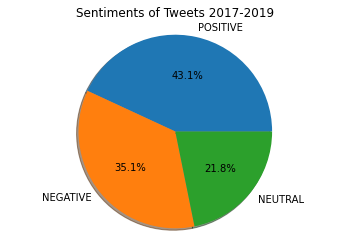

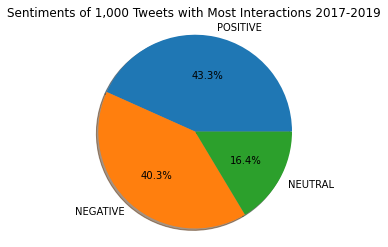

In [80]:
# A function to pie graph the sentiment of the tweets in a data frame, takes in a df and a graph title
def graph_sentiment(df, title): 
    labels = 'POSITIVE', 'NEGATIVE', 'NEUTRAL'
    sizes = [len(df[df["sentiment_label"] == POSITIVE].index), len(df[df["sentiment_label"] == NEGATIVE].index), 
         len(df[df["sentiment_label"] == NEUTRAL].index)]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True)
    plt.title(label=title)
    ax1.axis('equal')
    plt.show()
    
# Plot all tweets' sentiment
graph_sentiment(data,"Sentiments of Tweets 2017-2019")

# Lets look at sentiment of the top 1000 tweets compared to the overall
top_1000 = data.sort_values(by=["total_interactions"], ascending=False).head(1000)
graph_sentiment(top_1000,"Sentiments of 1,000 Tweets with Most Interactions 2017-2019")

So a couple of things are goin on here. Looking at all the data, most tweets are positive in sentiment towards climate change but its no majority. Also, a fair amount of tweets are labeled as neutral but its about half as many compared with the positive sentiment tweets.

In regards to the bottom graph that looked at the top 1,000 most interacted with tweets (i.e. sum of retweets and favorites), they were a good bit more negative that the full data set by about 5% and they were less neutral. Though, the positive percentage is basically the same for all tweets and the most interacted with ones. One could may make an assumption that more polarzing or negative tweets are more negative but I am not sure we have the full evidence for that here.

## Machine Learning
I will be following this tutorial on how to work with text data and do ML with it: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html.

### Tranform documents into feature vectors
Explain this.

In [81]:
# Transform the documents to feature vectors
count_vect = CountVectorizer()
# Train with 80% of the data
training_data = data.sample(frac=8/10) 

# Learns vocab used in training tweets, returns document term matrix
# same as fitting then transforming
# but slightly more efficent
X_train_counts = count_vect.fit_transform(training_data["tweet"])

# Test it out with a common word in the data set
print("The word climate is used", count_vect.vocabulary_.get(u'climate'), "times in all the training tweets.")

The word climate is used 10827 times in all the training tweets.


### TF-IDF
What is TF-IDF?

In [82]:
# fit estimator to data
tfidf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts) 
# transform the count matrix into a tf-idf representation
X_train_tfidf = tfidf_transformer.transform(X_train_counts) 
print("The shape of the the TF-IDF matrix is",X_train_tfidf.shape)

The shape of the the TF-IDF matrix is (66899, 66749)


### Naive Bayes Classifier
But why you choose that
https://monkeylearn.com/text-classification-naive-bayes/
https://medium.com/analytics-vidhya/naive-bayes-classifier-for-text-classification-556fabaf252b

In [93]:
# Build a df of test data that is not in training data
df = data.copy().drop(training_data.index)
X_test= df["tweet"]
y_test = df["sentiment_label"]

# Train the classifier
clf = MultinomialNB().fit(X_train_tfidf, training_data["sentiment_label"])

X_new_counts = count_vect.transform(X_test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
y_pred_test = clf.predict(X_new_tfidf)  

In [94]:
# function to Print the first 5 predicted sentiments with the corresponding tweet
def print_predictions(X_test, predicted):
    for (tweet, sentiment) in zip(X_test[:10], predicted[:10]):
        result = ""
        # matche the sentiment integer to its meaning
        if sentiment == POSITIVE:
            result += "Positive: " 
        elif sentiment == NEGATIVE:
            result += "Negative: " 

        elif sentiment == NEUTRAL:
            result += "Neutral: "
        result += tweet + "\n"
        print(result)

In [95]:
print_predictions(X_test, predicted)

Negative: collective moral responsibility ensure earth preserve child generation come climate change real consequence undeniable robust action require order safeguard community environment earthday

Positive: lesliegarciax carlcannottweet vinnyguadagnino realdonaldtrump worth know global climate change real complexity important overlook people attempt end argument validate mean net worth representation intelligence

Positive: millennial need start vote gerontocracy kill

Positive: work republican climate change deniers donald trump marco rubio etc destroy beautiful planet unfortunately grand daughter live legacy hopefully gop implode donald party start repair planet

Positive: young activist like gretathunberg lead way role model study show student shift elder attitude climatechange sciam

Positive: learn today half palmoil import europe additive diesel fuel reason detest diesel save planet lung need illegal rt spread word fight climatechange

Negative: thing eu environment single use 

In [98]:
naive_bayes_score = accuracy_score(y_test, y_pred_test)
print("Accuracy score for Naive Bayes is",naive_bayes_score)
print("This means the Naive Bayes classification is only correct", int(naive_bayes_score*100), "percent of the time.")

Accuracy score for Naive Bayes is 0.6834678624813154
This means the Naive Bayes classification is only correct 68 percent of the time.


That is not too bad. I would like to see if we can do any better though. Next I will be trying this same classification problem out with a random forest classification, into the woods we go!

### Random Forest Classification
From this point on I am not going to explicity do each step like I do for the Naive Bayes. Instead I will use the pipline class to let sklearn know that I want to use count vectorizering, td-idf, and then let it know the classifier I want to uss.

What's that man?
Why you pick RFC?
I referenced this tutorial on evaluating random forests: https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56.

In [99]:
# use sklearn's Pipline class to classify tweets with a random forest
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', RandomForestClassifier()),
 ])
text_clf.fit(training_data["tweet"], training_data["sentiment_label"])
y_pred_test = text_clf.predict(X_test)

In [100]:
print_predictions(X_test, y_pred_test)

Positive: collective moral responsibility ensure earth preserve child generation come climate change real consequence undeniable robust action require order safeguard community environment earthday

Positive: lesliegarciax carlcannottweet vinnyguadagnino realdonaldtrump worth know global climate change real complexity important overlook people attempt end argument validate mean net worth representation intelligence

Negative: millennial need start vote gerontocracy kill

Negative: work republican climate change deniers donald trump marco rubio etc destroy beautiful planet unfortunately grand daughter live legacy hopefully gop implode donald party start repair planet

Positive: young activist like gretathunberg lead way role model study show student shift elder attitude climatechange sciam

Positive: learn today half palmoil import europe additive diesel fuel reason detest diesel save planet lung need illegal rt spread word fight climatechange

Positive: thing eu environment single use 

In [101]:
forest_accuracy = accuracy_score(y_test, y_pred_test)
print("The random forest has an accuracy score of", forest_accuracy)

The random forest has an accuracy score of 0.8630792227204783


Though sklearn does not reccomend Random Forest Classifiers for text to start off, it can still be used and concepetually is pretty simple and can do an even better job than Naive Bayes. This can still be improved on likely though. One of the best options for text classification is SVM so that is what we will try out next.

### Support Vector Machines (SVM)

In [104]:
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SVC()),
 ])
text_clf.fit(training_data["tweet"], training_data["sentiment_label"])
y_pred_test = text_clf.predict(X_test)

In [108]:
svm_score = accuracy_score(y_test, y_pred_test)
svm_score

0.905949177877429

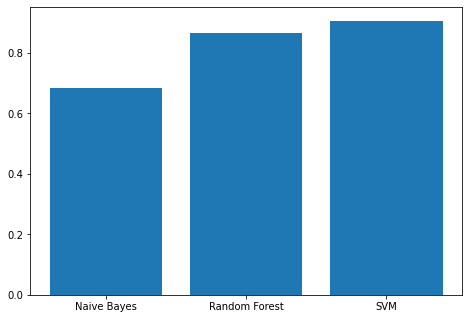

In [109]:
# Graphically compare the performance of the classifiers
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
learners = ['Naive Bayes', 'Random Forest', 'SVM']
scores = [naive_bayes_score,forest_accuracy,svm_score]
ax.bar(learners,scores)
plt.show()

# <center> Insight </center>
So what did we learn here?

# <center> Acknowledgements </center>
I would like to thank the George Washington University's TweetSets organization for their data set on climate change on Twitter. Their data and website to sample the data set made this project so much easier. Once again all of their data sets from Twitter can be found right [here](https://tweetsets.library.gwu.edu).

I would also like to thank the UMD CS Prof. John Dickerson and his CMSC320 instructional staff for their help and advice while working on this project.